In [15]:
# This notebook contains testing for predicting straight line parameters
# Works like a charm... :)

In [ ]:
import os
import numpy as np
import pandas as pd
from trackml.dataset import load_event
from trackml.randomize import shuffle_hits
from trackml.score import score_event
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import matplotlib.pyplot as plt
from hough import *
from conformalMap import *
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import layers
import tensorflow as tf

%matplotlib inline

In [155]:
import random

train_X = []
train_Y = []
dims = 50
N = 10000
for i in range(N):
    k = random.uniform(0, 1)
    m = random.uniform(0, 1)
    train_Y.append([k, m])
    image = np.zeros((dims, dims))
    for x in range(dims):
        y = k * x + m
        image[x, int(y)] = 1
    train_X.append(image)

train_X = np.reshape(train_X, (N, dims, dims, 1))
train_Y = np.reshape(train_Y, (N, 2))

In [156]:
def build_model():
  model = keras.Sequential([
    layers.Conv2D(8, (3, 3), activation="relu", input_shape=(dims, dims, 1)),
    layers.Conv2D(8, (3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(16, (3, 3), activation="relu"),
    layers.Conv2D(16, (3, 3), activation="relu"),
    layers.Flatten(),
    layers.Dense(2)
  ])

  #optimizer = keras.optimizers.RMSprop(learning_rate=0.00001) #0.00001 works good
  model.compile(loss='mse', optimizer='adam')
  return model

In [157]:
model = build_model()

In [158]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_73 (Conv2D)           (None, 48, 48, 8)         80        
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 46, 46, 8)         584       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 23, 23, 8)         0         
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 21, 21, 16)        1168      
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 19, 19, 16)        2320      
_________________________________________________________________
flatten_19 (Flatten)         (None, 5776)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 2)                 11554     
Total para

In [159]:
#example_batch = train_X[:1]
#example_result = model.predict(example_batch)
#example_result

In [160]:
EPOCHS = 1
print(train_X.shape)
print(train_Y.shape)
history = model.fit(train_X, train_Y, validation_split=0.1, epochs=EPOCHS)

(10000, 50, 50, 1)
(10000, 2)
Train on 9000 samples, validate on 1000 samples
Epoch 1/1
9000/9000 [==============================] - 9s 985us/step - loss: 0.0423 - val_loss: 0.0283


In [161]:
print(train_X.shape)
prediction = model.predict(train_X)
#print(prediction - train_Y)
print(prediction)
print(train_Y)

(10000, 50, 50, 1)
[[0.02979961 0.58398056]
 [0.7140066  0.6966057 ]
 [0.73253703 0.75247556]
 ...
 [0.210651   0.41628855]
 [0.48325822 0.38517833]
 [0.9129564  0.6463789 ]]
[[0.03084216 0.74953181]
 [0.74717997 0.75256234]
 [0.73355204 0.97153438]
 ...
 [0.22981527 0.07144909]
 [0.51362015 0.3909448 ]
 [0.96228801 0.43532982]]


In [171]:
k = random.uniform(0, 1)
m = random.uniform(0, 1)
image = np.zeros((dims, dims))
for x in range(dims):
    y = k * x + m
    image[x, int(y)] = 1
    
predicted_params = model.predict(np.array([np.reshape(image, (dims, dims, 1))]))
print(predicted_params)

[[0.44019714 0.48583636]]


## Real line

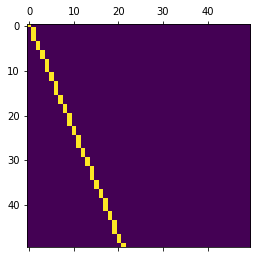

In [172]:
plt.matshow(image)
plt.show()

## Predicted line


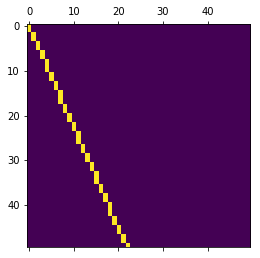

In [173]:
predicted_image = np.zeros((dims, dims))
for x in range(dims):
    y = predicted_params[0][0] * x + predicted_params[0][1]
    predicted_image[x, int(y)] = 1
plt.matshow(predicted_image)
plt.show()

In [174]:
print("Equation predicted from neural network:", "y =", str(k) + "x", "+", m)

Equation predicted from neural network: y = 0.41867995022983684x + 0.673239055540219
